In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


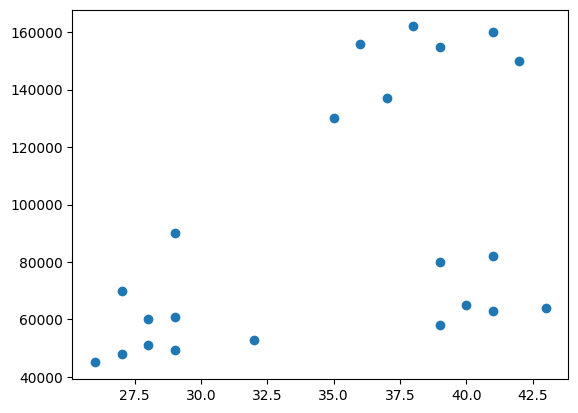

In [14]:
plt.scatter(df['Age'] , df['Income($)'])

In [19]:
km = KMeans(n_clusters = 3)
km

KMeans(n_clusters=3)

In [22]:
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])
y_predicted

C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [23]:
df['group'] = y_predicted
df.head()

,Name,Age,Income($),group
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [26]:
df1 = df[df.group==0]
df2 = df[df.group == 1]
df3 = df[df.group == 2]

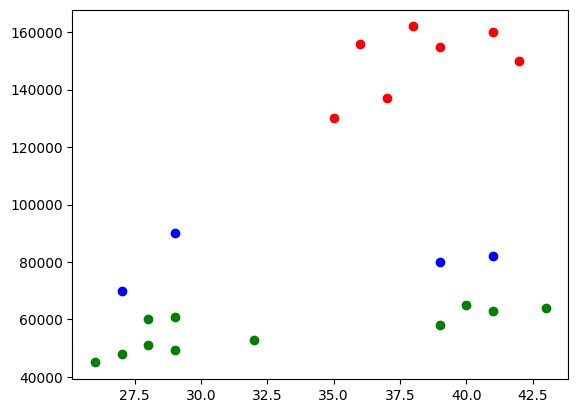

In [29]:
plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')

In [31]:
# the error is due to difference in scaling of x-axis and y-axis
scaler = MinMaxScaler()
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),group
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,0
3,Ismail,28,0.128205,0
4,Kory,42,0.897436,1
5,Gautam,39,0.940171,1
6,David,41,0.982906,1
7,Andrea,38,1.000000,1
8,Brad,36,0.948718,1
9,Angelina,35,0.726496,1


In [35]:
scaler.fit(df[['Age']])
df.Age = scaler.transform(df[['Age']])
df

,Name,Age,Income($),group
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [41]:
km =KMeans(n_clusters = 3)
y_predicted = km.fit_predict(df[['Age' , 'Income($)']])

df['group'] = y_predicted
df.head()

C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Name,Age,Income($),group
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1


In [43]:
km.cluster_centers_ # center of clusters

array([[0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ]])

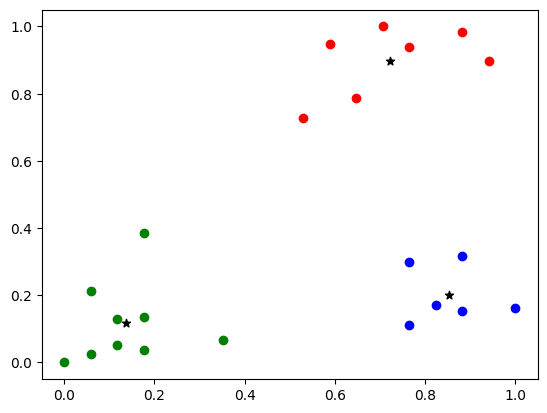

In [45]:
df1 = df[df.group==0]
df2 = df[df.group == 1]
df3 = df[df.group == 2]

plt.scatter(df1.Age , df1['Income($)'] , color = 'green')
plt.scatter(df2.Age , df2['Income($)'] , color = 'red')
plt.scatter(df3.Age , df3['Income($)'] , color = 'blue')
plt.scatter(km.cluster_centers_[:,0] , km.cluster_centers_[:,1] , color='black' , marker = '*')

In [47]:
# now lets draw elbow plot for k
k_rng = range(1,10)
sse = []

for k in k_rng:
    km = KMeans(n_clusters = k)
    km.fit(df[['Age' , 'Income($)']])
    sse.append(km.inertia_)
sse    

C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\kshit\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2621792762345213,
 0.21055478995472496,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

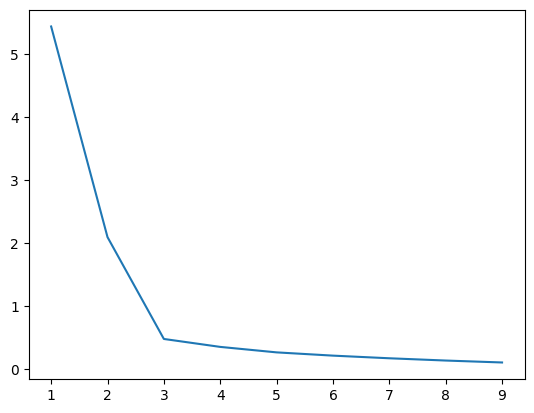

In [48]:
plt.plot(k_rng , sse) # elbow